In [1]:
from skimage.feature import hog
from skimage.transform import pyramid_gaussian
from skimage.io import imread
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from skimage import color
from imutils.object_detection import non_max_suppression
import imutils
import numpy as np
import argparse
import cv2
import os
import glob
from PIL import Image # This will be used to read/modify images (can be done via OpenCV too)
from numpy import *

In [3]:
# define path to images:

pos_im_path = 'INRIA_Dataset_Samples/train/pos/' # This is the path of our positive input dataset
# define the same for negatives
neg_im_path= 'INRIA_Dataset_Samples/train/neg/'

# read the image files:
pos_im_listing = os.listdir(pos_im_path) # it will read all the files in the positive image path (so all the required images)
neg_im_listing = os.listdir(neg_im_path)
num_pos_samples = size(pos_im_listing) # simply states the total no. of images
num_neg_samples = size(neg_im_listing)
labels = []

2416
1218


In [50]:
hog_images = []
og_images=[]
hog_features = []
ppc = 16

for file in pos_im_listing: #this loop enables reading the files in the pos_im_listing variable one by one
    img = Image.open(pos_im_path + '\\' + file) 
    og_images.append(img) # open the file
    img = resize(img,(164,28,2))
#     gray = img.convert('L') # convert the image into single channel i.e. RGB to grayscale
    # calculate HOG for positive features
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)
    labels.append(1)
    
    
    
for file in neg_im_listing:
    img= Image.open(neg_im_path + '\\' + file)
    og_images.append(img)
    img = resize(img,(164,28,2))
#     gray = img.convert('L') # convert the image into single channel i.e. RGB to grayscale
    # calculate HOG for positive features
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)
    labels.append(0)
    


In [21]:
from sklearn import svm
(trainData, testData, trainLabels, testLabels) = train_test_split(hog_features, labels, test_size=0.20, random_state=42)
#%% Train the linear SVM
print(" Training Linear SVM classifier...")
model = LinearSVC()
model.fit(trainData, trainLabels)
#%% Evaluate the classifier
print(" Evaluating classifier on test data ...")
predictions = model.predict(testData)

 Training Linear SVM classifier...
 Evaluating classifier on test data ...
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       236
           1       0.99      0.99      0.99       491

    accuracy                           0.98       727
   macro avg       0.98      0.98      0.98       727
weighted avg       0.98      0.98      0.98       727



Accuracy of SVM model: 0.9834938101788171


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       236
           1       0.99      0.99      0.99       491

    accuracy                           0.98       727
   macro avg       0.98      0.98      0.98       727
weighted avg       0.98      0.98      0.98       727

Quantitative results: 
Correctly classified:


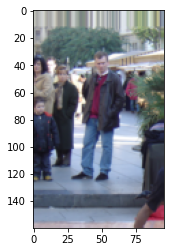

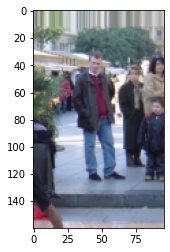

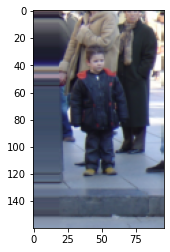

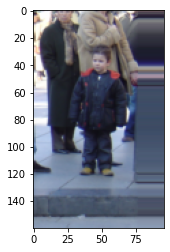

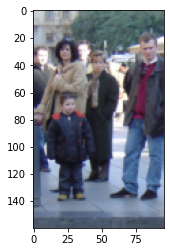

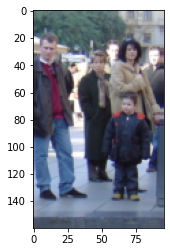

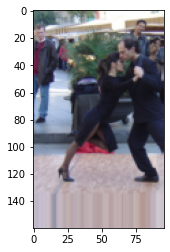

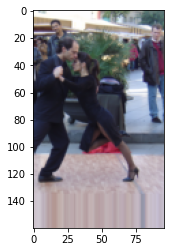

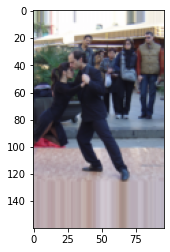

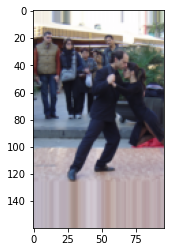

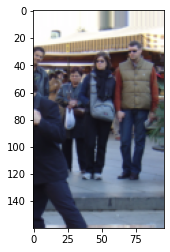

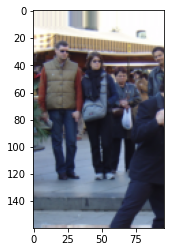

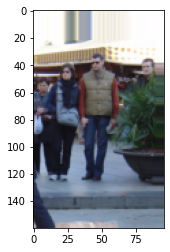

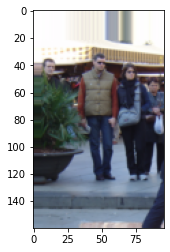

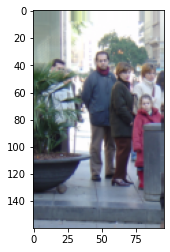

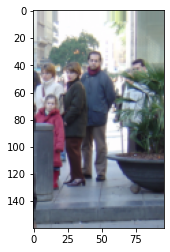

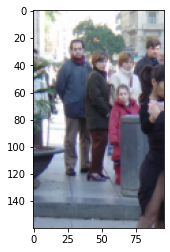

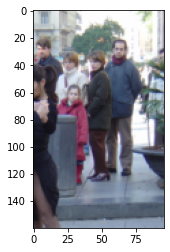

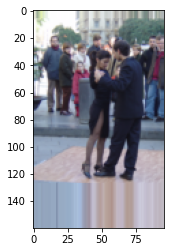

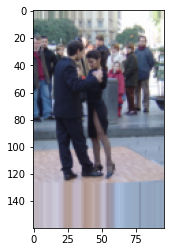

Incorrectly classified:


In [60]:
from sklearn.metrics import classification_report,accuracy_score
print("Accuracy of SVM model: "+str(accuracy_score(testLabels, predictions)))
print('\n')
print(classification_report(testLabels, predictions))
right = []
wrong = []

print("Quantitative results: ")
for i in range (20):
        if testLabels[i] != predictions[i]:
            wrong.append(i)
        else:
            right.append(i)
print("Correctly classified:")
for img in right:
        plt.imshow(og_images[img])
        plt.show()
print("Incorrectly classified:")
for img in wrong:
        plt.imshow(og_images[img])
        plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(trainData, trainLabels)

y_pred=clf.predict(testData)

Accuracy of Random Forest model: 0.9752407152682255


              precision    recall  f1-score   support

           0       0.99      0.94      0.96       236
           1       0.97      0.99      0.98       491

    accuracy                           0.98       727
   macro avg       0.98      0.97      0.97       727
weighted avg       0.98      0.98      0.98       727

Quantitative results: 
Correctly classified:


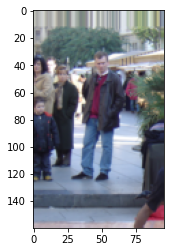

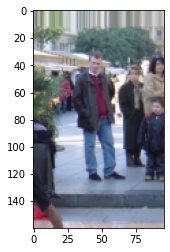

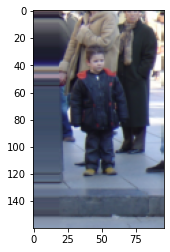

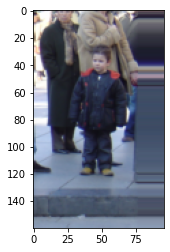

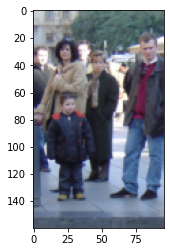

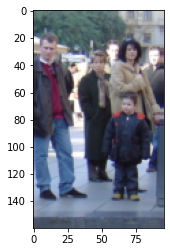

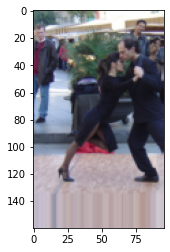

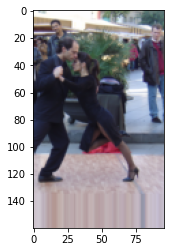

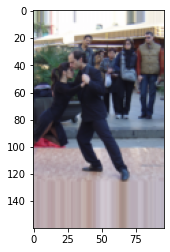

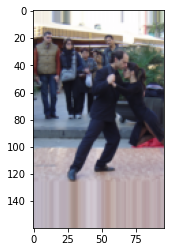

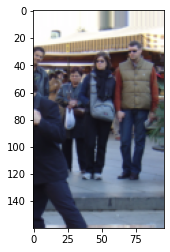

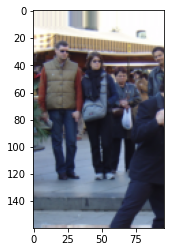

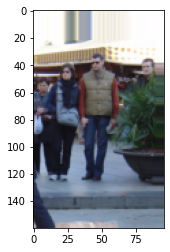

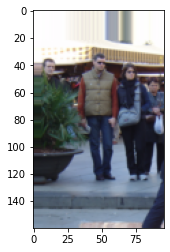

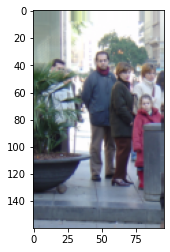

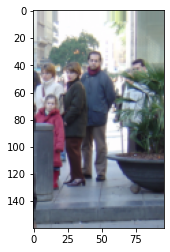

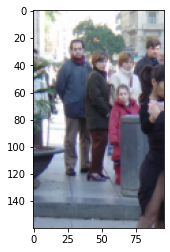

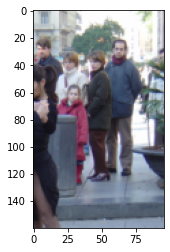

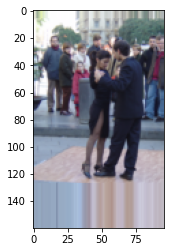

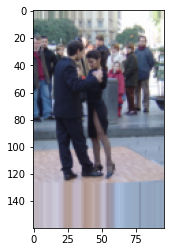

Incorrectly classified:


In [61]:
print("Accuracy of Random Forest model: "+str(accuracy_score(testLabels, y_pred)))
print('\n')
print(classification_report(testLabels, y_pred))
right = []
wrong = []

print("Quantitative results: ")
for i in range (20):
        if testLabels[i] != y_pred[i]:
            wrong.append(i)
        else:
            right.append(i)
print("Correctly classified:")
for img in right:
        plt.imshow(og_images[img])
        plt.show()
print("Incorrectly classified:")
for img in wrong:
        plt.imshow(og_images[img])
        plt.show()